In [8]:
import sys
sys.path.append("..")
import splitwavepy as sw

import scipy
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# generate a list of error surfaces

listM = []
for x in range(20):
    listM.append(sw.EigenM(fast=40,lag=2.3,delta=0.1,noise=0.1))
    

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


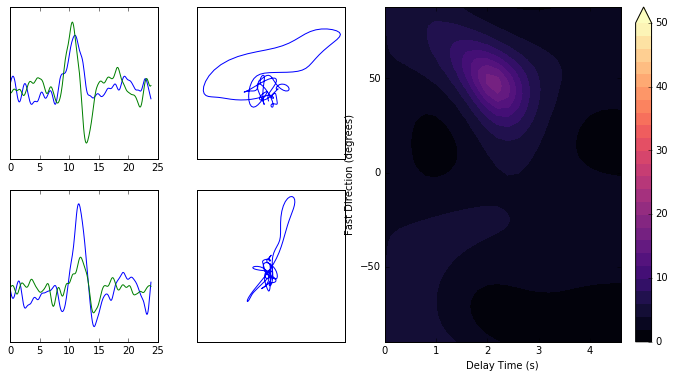

In [10]:
listM[3].plot()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


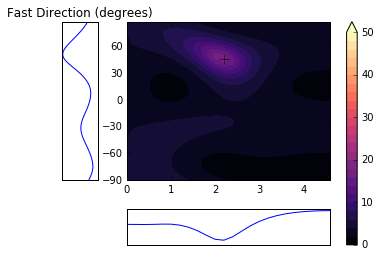

In [13]:
# plot matrix of error surfaces

listM[3].plotsurf()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


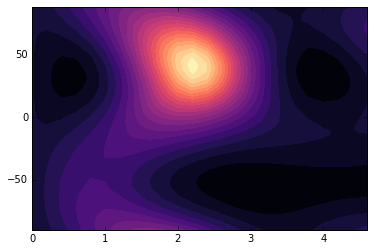

In [4]:
def stackL1L2(listM):
    """
    Stack a list of simple lam1/lam2 surfaces
    """  
    stack = np.zeros(listM[0].degs.shape)
    
    for M in listM:
        stack = stack + (M.lam1 / M.lam2)
        
    return stack / len(listM)

stkL1L2 = stackL1L2(listM)
plt.contourf(listM[0].tlags,listM[0].degs,stkL1L2,25,cmap='magma')
plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


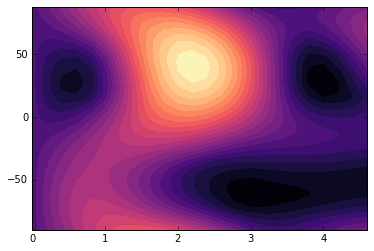

In [5]:
def stackWS(listM):
    """stack Lam2 surfaces,
    following Wolfe and Silver,
    normalize by minlam2"""
    stack = np.zeros(listM[0].degs.shape)
    
    for M in listM:
        stack = stack + (M.lam2/M.lam2.min())
        
    return stack / len(listM)

stkWS = stackWS(listM)
plt.contourf(listM[0].tlags,listM[0].degs,stkWS,25,cmap='magma_r')
plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


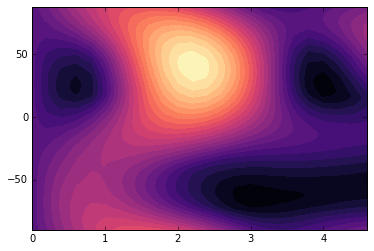

In [6]:
def stackRH(listM):
    """stack Lam2 surfaces,
    following Restivo and Helffrich,
    normalize by minlam2 and weight by SNR"""
    
    stack = np.zeros(listM[0].degs.shape)
    sumwt = 0.
    
    for M in listM:
        stack = stack + M.snrRH * (M.lam2/M.lam2.min())
        sumwt += M.snrRH
    return stack / sumwt

stkRH = stackRH(listM)
plt.contourf(listM[0].tlags,listM[0].degs,stkRH,25,cmap='magma_r')
plt.show()    

In [7]:
listM[0].lagprofile

array([ 212.49882572,  212.67466017,  213.51576479,  216.22319041,
        224.18397691,  241.89117724,  268.2315174 ,  305.34537664,
        356.47725042,  423.26552478,  497.09156872,  543.56011168,
        519.2535949 ,  438.3602134 ,  351.37035381,  282.7653491 ,
        234.21312662,  201.20741749,  179.41176292,  166.02818601,
        160.10990887,  162.76310494,  170.04061436,  179.01487085])

In [14]:
from sw.eigval import stack


ImportError: No module named 'sw'